<a href="https://colab.research.google.com/github/MariliaRot/Iris_SVM_kNN_prediction/blob/main/Analise_preditiva_exemplo_pr%C3%A1tico_de_classifica%C3%A7%C3%A3o_com_SVM_e_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mais clássico que jogo do Barcelona vs Real madrid, que Bohemian Rhapsody do Queen ou ainda que Chapolin Colorado... este notebook pretende fazer uma análise preditiva sobre o conjunto de dados Iris.**

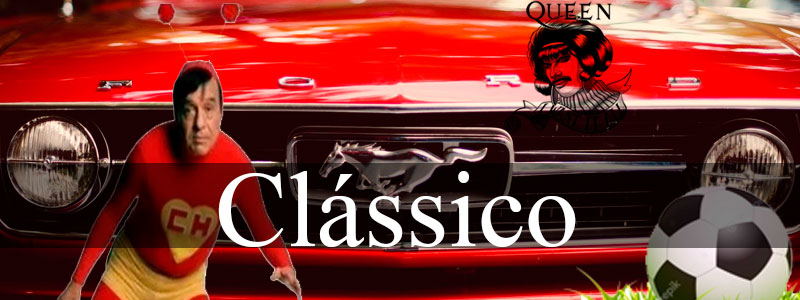


А análise preditiva pode ser entendida como um processo que permite descobrir o relacionamento e similaridade existente entre os exemplares de um conjunto de dados, descritos por uma série de características (atributos descritivos), e os rótulos a eles associados (atributo de classe).
Normalmente, aplicamos aprendizado de maquina para tentar prever esse rotulo/classe.

A similaridade é a base de muitos métodos de data science. Se duas coisas (instancias, pessoas, empresas, produtos) são semelhantes em alguns aspectos, costumam compartilhar outras características também. Muitas vezes, os procedimentos de mineração de dados são baseados no agrupamento de coisas por semelhança ou na busca pelo tipo “certo” de similaridade. 

O processo de construção do modelo de predição se dá por meio do ajuste de parâmetros realizado por um algoritmo, e, quando Aprendizado de Máquina é usado para isso, o processo é indutivo e popularmente chamado de treinamento ou aprendizado supervisionado.

Em geral, no processo de aprendizado, para a construção do modelo que será utilizado para classificar novas instancias, normalmente os dados são divididos em duas partes: 
*   uma parte é usada para treinar todo o modelo,
*   a outra parte é utilizada para testar o modelo e permitir a verificação de quão eficiente foi o processo de aprendizado.




Utilizaremos neste notebook, como exemplo prático, o clássico conjunto de dados Iris. Este conjunto de dados é amplamente usado como um conjunto de dados para iniciantes para fins de aprendizado de máquina. 

No Python este dataset está disponivel no pacote de aprendizado de máquina Scikit-learn.

Neste conjunto de dados são encontrados 150 instâncias com cinco atributos: largura e comprimento de sépala, largura e comprimento da pétala e a espécie.

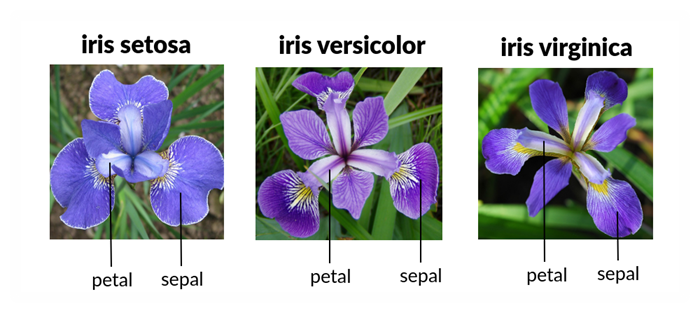

Construiremos um modelo que seja capaz de responder: qual especie de iris a flor com as caracteristicas abaixo pertence: setosa, versicolor ou viginica?


> sepal length (cm): 7

> sepal width (cm): 3.2

> petal length (cm): 5.8

> petal width (cm):1.9



Utilizaremos o modelo SVM(Support vector machine) e o modelo kNN(k Nearest Neighbors) para resolver o problema de classificação e assim responder a pergunta acima.


In [13]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm

In [14]:
# Importando o dataset como dataframe pandas atribuindo a variavel iris_df
iris = load_iris()
iris_df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
# 'puxando' os dados atribuido a variavel 'X' as features e a variavel 'y' os rótulos
X, y = load_iris(return_X_y=True)

In [16]:
# dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [17]:
X_train.shape

(105, 4)

In [18]:
y_test.shape

(45,)

 ## É aqui que começa a mágica!! <a href="https://www.imagensanimadas.com/cat-magicos-e-magos-711.htm"><img src="https://www.imagensanimadas.com/data/media/711/magico-e-mago-imagem-animada-0070.gif" border="0" alt="magico-e-mago-imagem-animada-0070" /></a>

In [19]:
# instanciando um classificador
clf = svm.SVC(C=1.0)

# Esta implementação é baseada em libsvm. O que é viavel ao nosso conjunto de 
# dados por ser pequeno, mas pode ser impraticável para conjuto de dados além 
# de dezenas de milhares de amostras.

# executando o treinamento
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
# fazendo a predição e alocando na vairavel y_test
y_pred= clf.predict(X_test)
y_pred

array([0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0,
       2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1,
       2])

In [21]:
# Medindo o desempenho do classificador SVM
clf.score(X_test,y_test)

0.9555555555555556

In [22]:
# imprimindo os dados de PRECISAO, REVOCAÇÃO e PONTUAÇÃO F1

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.90      1.00      0.95        19
   virginica       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.96        45
weighted avg       0.96      0.96      0.95        45



 ## Chegou o 'teu momento' <a href="https://www.imagensanimadas.com/cat-cachorros-202.htm"><img src="https://www.imagensanimadas.com/data/media/202/cachorro-imagem-animada-0830.gif" border="0" alt="cachorro-imagem-animada-0830" /></a>
 
 **Respondendo a pergunta desafio:**

In [23]:
q_iris= iris_df
q_iris=q_iris.drop(range(0,150))

questao = {'sepal length (cm)':7,	'sepal width (cm)':3.2,	'petal length (cm)':5.8,	'petal width (cm)':1.9}
q_iris=q_iris.append(questao, ignore_index=True)



resposta= clf.predict(q_iris)
resposta

array([2])

In [24]:
questao=[[7,3.2,5.8,1.9]]
q_iris=pd.DataFrame(data=questao,columns=iris.feature_names)
print("A nossa flor tem as seguintes caracteristicas:\n\n",q_iris)

target_names=iris.target_names
target_names

print(f"\n\nSegundo o modelo SVM a especie da flor pesquisada é: {target_names[resposta]}")

A nossa flor tem as seguintes caracteristicas:

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  7               3.2                5.8               1.9


Segundo o modelo SVM a especie da flor pesquisada é: ['virginica']


In [25]:
# salvando os rotulos em variavel para apresentar
target_names=iris.target_names
target_names

print(f"A especie da flor pesquisada é:\n{target_names[resposta]}")

A especie da flor pesquisada é:
['virginica']


##<a href="https://www.imagensanimadas.com/cat-computadores-56.htm"><img src="https://www.imagensanimadas.com/data/media/56/computador-imagem-animada-0178.gif" border="0" alt="computador-imagem-animada-0178" /></a> Conforme o modelo **SVM** a resposta da nossa questão é a especie de tipo 2: "**virginica**".

----------------------------------------------------------------------------------------------

# ► A mágica dos vizinhos mais democráticos do BatPlaneta - **kNN**

<a href="https://www.imagensanimadas.com/cat-batman-981.htm"><img src="https://www.imagensanimadas.com/data/media/981/batman-imagem-animada-0010.gif" border="0" alt="batman-imagem-animada-0010" /></a>

In [26]:
# importando biblioteca NEIGHBORS 
from sklearn.neighbors import KNeighborsClassifier

In [27]:
# atribuindo em uma variavel a quantidade de vizinhos a ser consultada
n_neighbors = 10

In [28]:
# instanciando o classificador e passando a variavél 'n_neighbors'
clf_knn = KNeighborsClassifier(n_neighbors)

**que comecem os JOGOS, digo treino...**

<img src="https://1.bp.blogspot.com/-ZPWa0ThRIj4/WL2FFWaGy4I/AAAAAAAAY_0/ItgZSJwkxlcnWCbf6LWz4ArcQWTB1bJoQCLcB/s320/Gifs%2Banimados%2BJogos%2BVorazes%2B3.gif" border="0" alt="jogos-vorazes" /></a>

In [29]:
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [30]:
# armazenado os resultados do teste

y_pred=clf_knn.predict(X_test)

In [32]:
# imprimindo os dados de PRECISAO, REVOCAÇÃO e PONTUAÇÃO F1
print(classification_report(y_test,y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      1.00      0.93        19
   virginica       1.00      0.79      0.88        14

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.94        45
weighted avg       0.94      0.93      0.93        45



<img src="http://4.bp.blogspot.com/-AHfLBll17bI/VRlHZvmr6KI/AAAAAAAAPx4/WYiRtVHOgIo/s1600/Seu%2BMadruga%2B4.gif" border="0" alt="madruga" />

...trazendo a resposta da nossa questão... 


In [33]:
questao=[[7,3.2,5.8,1.9]]
q_iris=pd.DataFrame(data=questao,columns=iris.feature_names)
print("A nossa flor tem as seguintes caracteristicas:\n\n",q_iris)

A nossa flor tem as seguintes caracteristicas:

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  7               3.2                5.8               1.9


In [38]:
target_names=iris.target_names
target_names

respostaknn= clf.predict(q_iris)
respostaknn

array([2])

In [39]:
print(f"\n\nSegundo o modelo kNN a especie da flor pesquisada é: {target_names[respostaknn]}")



Segundo o modelo kNN a especie da flor pesquisada é: ['virginica']


## **Segundo o modelo kNN a espécie da flor pesquisada também é 'virginica'.**

<img src="http://1.bp.blogspot.com/-yhgm8u5bKMs/VRlHCxiVVxI/AAAAAAAAPxQ/hIJBnF5DkeU/s1600/Seu%2BMadruga%2B15.gif" border="0" alt="madruga_dancando" /></a>